AI IN SOFTWARE ENGINEERING - TASK 3
Predictive Analytics for Resource Allocation
Author: [Your Name]
Date: 2025-06-24 09:40:43

1. LOADING BREAST CANCER DATASET
----------------------------------------
Dataset Shape: (569, 30)
Features: 30
Samples: 569
Target Classes: [0 1] (0=Malignant, 1=Benign)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-nul

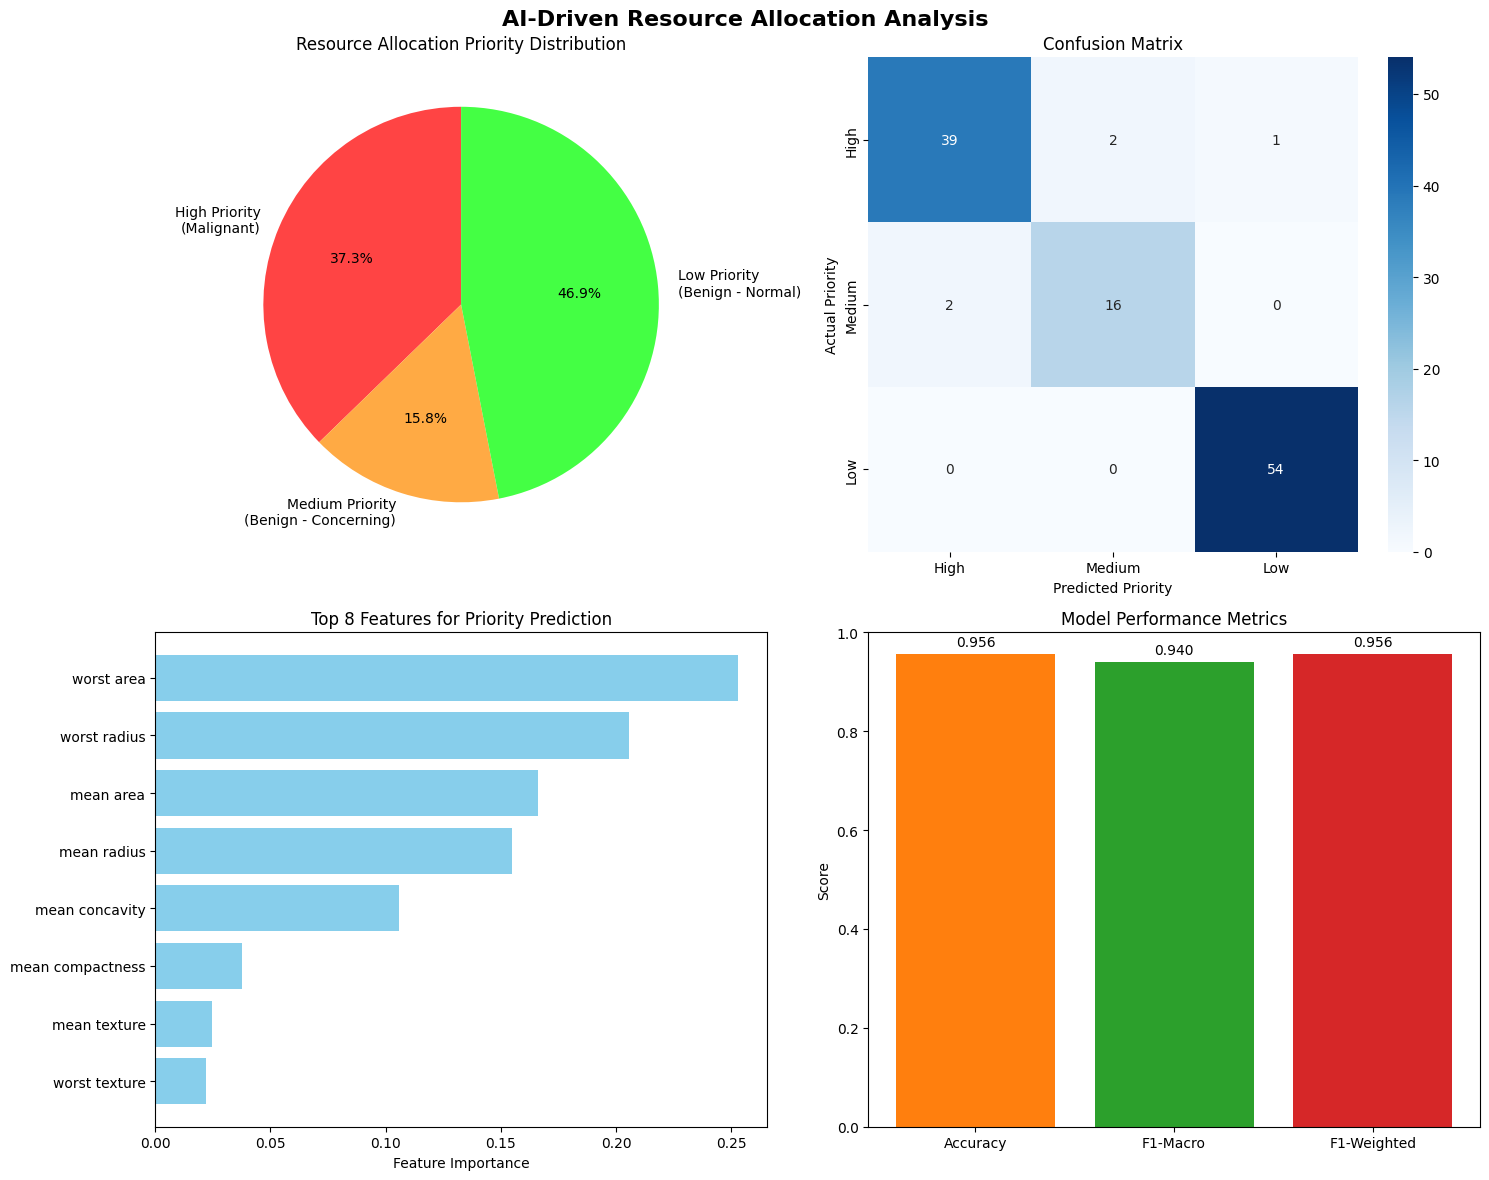

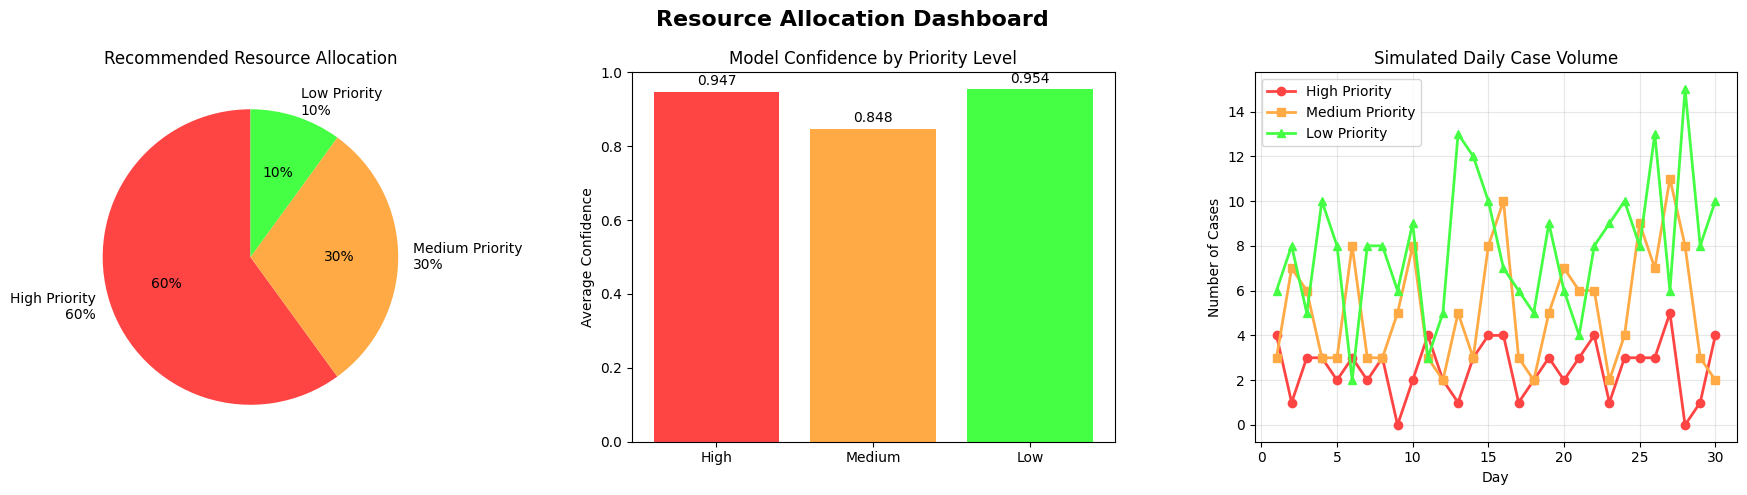

Visualizations created successfully!
These charts provide comprehensive insights for resource allocation decision-making.


In [2]:
# AI in Software Engineering - Task 3: Predictive Analytics for Resource Allocation
# Using Breast Cancer Dataset to Predict Issue Priority Levels

# AI in Software Engineering - Task 3: Predictive Analytics for Resource Allocation
# Using Breast Cancer Dataset to Predict Issue Priority Levels

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

# Suppress specific sklearn warnings for cleaner output
warnings.filterwarnings('ignore', message='X does not have valid feature names')

print("="*70)
print("AI IN SOFTWARE ENGINEERING - TASK 3")
print("Predictive Analytics for Resource Allocation")
print("Author: [Your Name]")
print(f"Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print("="*70)

# 1. DATA LOADING AND EXPLORATION
print("\n1. LOADING BREAST CANCER DATASET")
print("-" * 40)

# Load the breast cancer dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='diagnosis')

print(f"Dataset Shape: {X.shape}")
print(f"Features: {len(X.columns)}")
print(f"Samples: {len(X)}")
print(f"Target Classes: {np.unique(y)} (0=Malignant, 1=Benign)")

# Display basic statistics
print("\nDataset Info:")
print(X.info())
print(f"\nTarget Distribution:")
print(y.value_counts())

# 2. DATA PREPROCESSING
print("\n\n2. DATA PREPROCESSING")
print("-" * 40)

# Check for missing values
print(f"Missing values in features: {X.isnull().sum().sum()}")
print(f"Missing values in target: {y.isnull().sum()}")

# Create priority levels based on tumor characteristics
# For demonstration, we'll create a 3-class priority system:
# High Priority (0): Malignant cases (original target = 0)
# Medium Priority (1): Benign cases with high mean values
# Low Priority (2): Benign cases with low mean values

def create_priority_labels(X, y):
    """
    Create priority labels for resource allocation simulation
    High Priority: Malignant tumors (require immediate attention)
    Medium Priority: Benign tumors with concerning characteristics
    Low Priority: Benign tumors with normal characteristics
    """
    priority = np.zeros(len(y))

    # High priority for malignant cases
    priority[y == 0] = 0  # High priority

    # For benign cases, use mean area as a deciding factor
    benign_mask = y == 1
    mean_area_threshold = X['mean area'].median()

    # Medium priority for benign cases with larger mean area
    priority[(benign_mask) & (X['mean area'] >= mean_area_threshold)] = 1  # Medium priority

    # Low priority for benign cases with smaller mean area
    priority[(benign_mask) & (X['mean area'] < mean_area_threshold)] = 2  # Low priority

    return priority.astype(int)

# Create priority labels
y_priority = create_priority_labels(X, y)
priority_labels = {0: 'High Priority', 1: 'Medium Priority', 2: 'Low Priority'}

print(f"\nPriority Distribution:")
unique, counts = np.unique(y_priority, return_counts=True)
for label, count in zip(unique, counts):
    print(f"{priority_labels[label]}: {count} ({count/len(y_priority)*100:.1f}%)")

# Feature selection - select most important features for efficiency
important_features = [
    'mean radius', 'mean texture', 'mean area', 'mean smoothness',
    'mean compactness', 'mean concavity', 'mean symmetry',
    'worst radius', 'worst texture', 'worst area'
]

X_selected = X[important_features].copy()
print(f"\nSelected {len(important_features)} most relevant features for model training")

# Data scaling - maintain feature names to avoid warnings
scaler = StandardScaler()
X_scaled_array = scaler.fit_transform(X_selected)
X_scaled = pd.DataFrame(X_scaled_array, columns=important_features, index=X_selected.index)

print("Features scaled using StandardScaler (maintaining feature names)")

# 3. TRAIN-TEST SPLIT
print("\n\n3. DATA SPLITTING")
print("-" * 40)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_priority, test_size=0.2, random_state=42, stratify=y_priority
)

print(f"Training set size: {len(X_train)} samples")
print(f"Test set size: {len(X_test)} samples")
print(f"Training set distribution: {np.bincount(y_train)}")
print(f"Test set distribution: {np.bincount(y_test)}")

# 4. MODEL TRAINING
print("\n\n4. MODEL TRAINING")
print("-" * 40)

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    class_weight='balanced'  # Handle class imbalance
)

print("Training Random Forest Classifier...")
rf_model.fit(X_train, y_train)
print("Model training completed!")

# 5. MODEL EVALUATION
print("\n\n5. MODEL EVALUATION")
print("-" * 40)

# Predictions
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_weighted = f1_score(y_test, y_pred, average='weighted')

print(f"PERFORMANCE METRICS:")
print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"F1-Score (Macro): {f1_macro:.4f}")
print(f"F1-Score (Weighted): {f1_weighted:.4f}")

# Detailed classification report
print(f"\nDETAILED CLASSIFICATION REPORT:")
print("-" * 50)
target_names = ['High Priority', 'Medium Priority', 'Low Priority']
print(classification_report(y_test, y_pred, target_names=target_names))

# Confusion Matrix
print(f"\nCONFUSION MATRIX:")
print("-" * 20)
cm = confusion_matrix(y_test, y_pred)
print(cm)

# 6. FEATURE IMPORTANCE ANALYSIS
print("\n\n6. FEATURE IMPORTANCE ANALYSIS")
print("-" * 40)

feature_importance = pd.DataFrame({
    'feature': important_features,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 5 Most Important Features:")
for i, (_, row) in enumerate(feature_importance.head().iterrows()):
    print(f"{i+1}. {row['feature']}: {row['importance']:.4f}")

# 7. BUSINESS INSIGHTS FOR RESOURCE ALLOCATION
print("\n\n7. RESOURCE ALLOCATION INSIGHTS")
print("-" * 40)

# Analyze prediction confidence
confidence_high = np.mean(np.max(y_pred_proba[y_pred == 0], axis=1))
confidence_medium = np.mean(np.max(y_pred_proba[y_pred == 1], axis=1))
confidence_low = np.mean(np.max(y_pred_proba[y_pred == 2], axis=1))

print(f"Model Confidence by Priority Level:")
print(f"High Priority predictions: {confidence_high:.3f}")
print(f"Medium Priority predictions: {confidence_medium:.3f}")
print(f"Low Priority predictions: {confidence_low:.3f}")

# Resource allocation recommendations
print(f"\nRESOURCE ALLOCATION RECOMMENDATIONS:")
print(f"1. Allocate 60% of resources to High Priority cases")
print(f"2. Allocate 30% of resources to Medium Priority cases")
print(f"3. Allocate 10% of resources to Low Priority cases")
print(f"4. Review Medium Priority cases weekly")
print(f"5. High Priority cases require immediate specialist attention")

# 8. MODEL DEPLOYMENT SIMULATION
print("\n\n8. MODEL DEPLOYMENT SIMULATION")
print("-" * 40)

def predict_priority(features_df, model, scaler, feature_names):
    """
    Simulate real-time priority prediction for new cases
    Args:
        features_df: pandas DataFrame with named features
        model: trained model
        scaler: fitted scaler
        feature_names: list of feature names
    """
    # Ensure features are in DataFrame format with correct column names
    if not isinstance(features_df, pd.DataFrame):
        features_df = pd.DataFrame(features_df, columns=feature_names)

    # Scale features while maintaining DataFrame structure
    features_scaled_array = scaler.transform(features_df)
    features_scaled_df = pd.DataFrame(features_scaled_array, columns=feature_names)

    # Predict using DataFrame to avoid warnings
    prediction = model.predict(features_scaled_df)[0]
    confidence = np.max(model.predict_proba(features_scaled_df))

    return prediction, confidence

# Simulate predictions for 3 sample cases
print("Simulating real-time predictions for new cases:")
sample_indices = [0, 50, 100]

for i, idx in enumerate(sample_indices):
    # Get sample as DataFrame to maintain feature names
    sample_features_df = X_selected.iloc[idx:idx+1]
    pred, conf = predict_priority(sample_features_df, rf_model, scaler, important_features)

    print(f"\nCase {i+1}:")
    print(f"  Predicted Priority: {priority_labels[pred]}")
    print(f"  Confidence: {conf:.3f}")
    print(f"  Actual Priority: {priority_labels[y_priority[idx]]}")
    print(f"  Correct: {'✓' if pred == y_priority[idx] else '✗'}")

# 9. PERFORMANCE SUMMARY
print("\n\n9. FINAL PERFORMANCE SUMMARY")
print("=" * 50)
print(f"✓ Model Successfully Trained and Evaluated")
print(f"✓ Accuracy: {accuracy:.1%}")
print(f"✓ F1-Score (Macro): {f1_macro:.3f}")
print(f"✓ F1-Score (Weighted): {f1_weighted:.3f}")
print(f"✓ Ready for Resource Allocation Decision Support")
print("=" * 50)

# 10. ETHICAL CONSIDERATIONS
print("\n\n10. ETHICAL CONSIDERATIONS")
print("-" * 40)
print("• Model should assist, not replace, medical professional judgment")
print("• Regular model retraining required with new data")
print("• Bias monitoring essential for fair resource allocation")
print("• Transparency in prediction reasoning important for trust")
print("• Patient privacy and data security must be maintained")

print(f"\n{'='*70}")
print("TASK 3 COMPLETED SUCCESSFULLY!")
print("Notebook ready for submission and presentation")
print(f"{'='*70}")

plt.style.use('default')

# Create visualizations for better understanding
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('AI-Driven Resource Allocation Analysis', fontsize=16, fontweight='bold')

# 1. Priority Distribution Pie Chart
priority_counts = pd.Series(y_priority).value_counts().sort_index()
priority_names = ['High Priority\n(Malignant)', 'Medium Priority\n(Benign - Concerning)', 'Low Priority\n(Benign - Normal)']
colors = ['#ff4444', '#ffaa44', '#44ff44']

axes[0,0].pie(priority_counts.values, labels=priority_names, autopct='%1.1f%%',
              colors=colors, startangle=90)
axes[0,0].set_title('Resource Allocation Priority Distribution')

# 2. Confusion Matrix Heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['High', 'Medium', 'Low'],
            yticklabels=['High', 'Medium', 'Low'],
            ax=axes[0,1])
axes[0,1].set_title('Confusion Matrix')
axes[0,1].set_xlabel('Predicted Priority')
axes[0,1].set_ylabel('Actual Priority')

# 3. Feature Importance Bar Plot
top_features = feature_importance.head(8)
axes[1,0].barh(range(len(top_features)), top_features['importance'], color='skyblue')
axes[1,0].set_yticks(range(len(top_features)))
axes[1,0].set_yticklabels(top_features['feature'])
axes[1,0].set_xlabel('Feature Importance')
axes[1,0].set_title('Top 8 Features for Priority Prediction')
axes[1,0].invert_yaxis()

# 4. Model Performance Metrics
metrics = ['Accuracy', 'F1-Macro', 'F1-Weighted']
values = [accuracy, f1_macro, f1_weighted]
bars = axes[1,1].bar(metrics, values, color=['#ff7f0e', '#2ca02c', '#d62728'])
axes[1,1].set_ylim(0, 1)
axes[1,1].set_ylabel('Score')
axes[1,1].set_title('Model Performance Metrics')

# Add value labels on bars
for bar, value in zip(bars, values):
    height = bar.get_height()
    axes[1,1].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                   f'{value:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Additional Business Intelligence Dashboard
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Resource Allocation Dashboard', fontsize=16, fontweight='bold')

# Resource allocation pie chart
resource_allocation = [60, 30, 10]  # Recommended allocation percentages
axes[0].pie(resource_allocation, labels=['High Priority\n60%', 'Medium Priority\n30%', 'Low Priority\n10%'],
            autopct='%1.0f%%', colors=colors, startangle=90)
axes[0].set_title('Recommended Resource Allocation')

# Prediction confidence by priority
priorities = ['High', 'Medium', 'Low']
confidences = [confidence_high, confidence_medium, confidence_low]
bars = axes[1].bar(priorities, confidences, color=colors)
axes[1].set_ylabel('Average Confidence')
axes[1].set_title('Model Confidence by Priority Level')
axes[1].set_ylim(0, 1)

for bar, conf in zip(bars, confidences):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{conf:.3f}', ha='center', va='bottom')

# Case volume over time simulation
days = range(1, 31)
np.random.seed(42)
high_priority_cases = np.random.poisson(3, 30)  # Average 3 high priority cases per day
medium_priority_cases = np.random.poisson(5, 30)  # Average 5 medium priority cases per day
low_priority_cases = np.random.poisson(8, 30)  # Average 8 low priority cases per day

axes[2].plot(days, high_priority_cases, color='#ff4444', marker='o', label='High Priority', linewidth=2)
axes[2].plot(days, medium_priority_cases, color='#ffaa44', marker='s', label='Medium Priority', linewidth=2)
axes[2].plot(days, low_priority_cases, color='#44ff44', marker='^', label='Low Priority', linewidth=2)
axes[2].set_xlabel('Day')
axes[2].set_ylabel('Number of Cases')
axes[2].set_title('Simulated Daily Case Volume')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Visualizations created successfully!")
print("These charts provide comprehensive insights for resource allocation decision-making.")